In [56]:
#import all necessary libraries
import numpy as np
import pandas as pd 
import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [57]:
data = pd.read_csv('/Users/claragazer/Desktop/Bachelorarbeit/Bachelor2/data/titanic.csv')

/var/folders/gq/vmytp8jn78gbgwl026974x9m0000gn/T/ipykernel_5659/2653293873.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/claragazer/Desktop/Bachelorarbeit/Bachelor2/data/titanic.csv')


In [58]:
data['Gender'].replace({'male': 0, 'female': 1}, inplace=True)

data = data.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])

print(data.head())


   PassengerId  Survived  Pclass  Gender   Age SibSp Parch       Fare
0         1310         1       1       1   NaN     0     0  76.760165
1         1311         0       3       0  29.0     0     0  10.193097
2         1312         0       3       0  20.0     0     0  12.029416
3         1313         0       3       0  27.0     0     0  13.429448
4         1314         0       3       0  32.0     0     0   4.840769


/var/folders/gq/vmytp8jn78gbgwl026974x9m0000gn/T/ipykernel_5659/3558689741.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace({'male': 0, 'female': 1}, inplace=True)
/var/folders/gq/vmytp8jn78gbgwl026974x9m0000gn/T/ipykernel_5659/3558689741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downca

In [59]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

# Data Description

In [60]:
data.shape

(999998, 8)

In [61]:
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("\nSpalten mit nicht-numerischen Werten:", non_numeric_columns)


Spalten mit nicht-numerischen Werten: Index(['SibSp', 'Parch'], dtype='object')


In [62]:
# Check for null values in the data set
data.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Gender              0
Age            198600
SibSp               0
Parch               0
Fare                1
dtype: int64

In [63]:
data['Age'].fillna(data['Age'].mean()).astype(float)  # Fills missing ages with the mean

0         37.806581
1         29.000000
2         20.000000
3         27.000000
4         32.000000
            ...    
999993    27.000000
999994    33.000000
999995    37.806581
999996    35.000000
999997    37.000000
Name: Age, Length: 999998, dtype: float64

Filling missing values with the mean (average) of a column is a common imputation technique, especially for numerical data. This approach is often chosen because it allows us to retain all records without introducing significant bias or distorting the dataset's overall distribution. By replacing missing values with the mean, we make a reasonable assumption that the missing data points are likely to be close to the average value, given that there is no additional information suggesting otherwise.

In [64]:
# Verification if the null values are gone
data.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Gender              0
Age            198600
SibSp               0
Parch               0
Fare                1
dtype: int64

In [65]:
# Provides information about storage, data type, amount of entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999998 entries, 0 to 999997
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  999998 non-null  int64  
 1   Survived     999998 non-null  int64  
 2   Pclass       999998 non-null  int64  
 3   Gender       999998 non-null  int64  
 4   Age          801398 non-null  float64
 5   SibSp        999998 non-null  object 
 6   Parch        999998 non-null  object 
 7   Fare         999997 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 61.0+ MB


In [66]:
data.head()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,1310,1,1,1,NaN,0,0,76.760165
1,1311,0,3,0,29.0,0,0,10.193097
2,1312,0,3,0,20.0,0,0,12.029416
3,1313,0,3,0,27.0,0,0,13.429448
4,1314,0,3,0,32.0,0,0,4.840769


In [67]:
# For numerical values, .describe() will provide non-zero values, the average mean, standard deviation, quantiles and the minimum and maximum value
data.describe()

,PassengerId,Survived,Pclass,Gender,Age,Fare
count,9.999980e+05,999998.000000,999998.000000,999998.000000,8.013980e+05,999997.000000
mean,5.013105e+05,0.381681,2.311249,0.351161,3.780658e+01,33.461173
std,2.886747e+05,0.485799,0.835771,0.477333,7.632768e+03,47.976693
min,1.310000e+03,0.000000,1.000000,0.000000,0.000000e+00,0.000000
25%,2.513112e+05,0.000000,2.000000,0.000000,2.100000e+01,8.568928
50%,5.013105e+05,0.000000,3.000000,0.000000,2.900000e+01,15.883655
75%,7.513098e+05,1.000000,3.000000,1.000000,3.700000e+01,35.561149
max,1.001309e+06,1.000000,3.000000,1.000000,6.832937e+06,640.883614


In [68]:
# Determine positive and negative correlations (1 being a perfect correlation, 0 no correlation, -1 a perfect negative correlation)
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

             PassengerId  Survived    Pclass    Gender       Age      Fare
PassengerId     1.000000  0.000600 -0.000217  0.000945 -0.001930  0.000178
Survived        0.000600  1.000000 -0.338739  0.547416 -0.000978  0.283253
Pclass         -0.000217 -0.338739  1.000000 -0.131637  0.000374 -0.580088
Gender          0.000945  0.547416 -0.131637  1.000000 -0.000964  0.185069
Age            -0.001930 -0.000978  0.000374 -0.000964  1.000000  0.105913
Fare            0.000178  0.283253 -0.580088  0.185069  0.105913  1.000000


<Axes: >

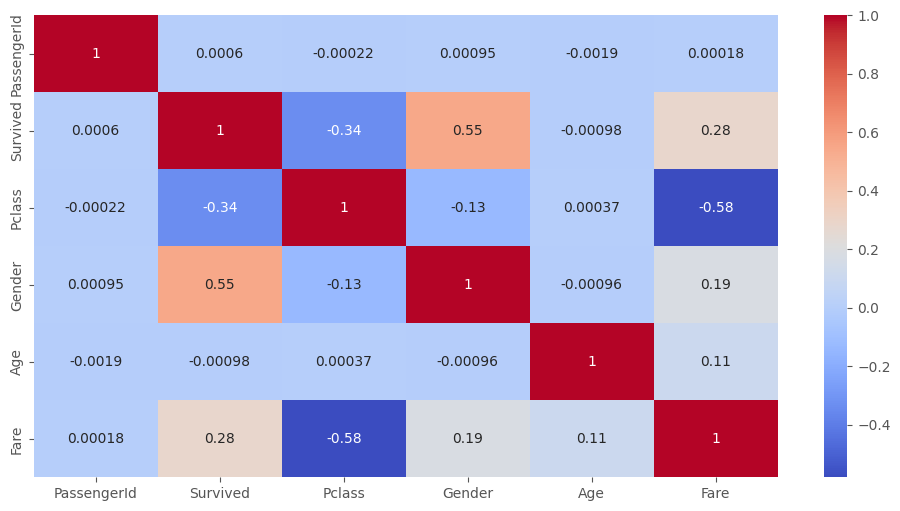

In [69]:
# Create a heatmap in order to visualize the correlation matrix of the train_data DataFrame
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

# Data Analysis

In [70]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.625446
1,2,0.477069
2,3,0.239763


In [71]:
data[["Gender", "Survived"]].groupby(['Gender'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Gender,Survived
1,1,0.743166
0,0,0.186040


In [72]:
data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.637379
10,3,0.605948
8,1,0.554497
1,1,0.553757
2,2,0.496068
9,2,0.483669
7,0,0.342115
0,0,0.340959
5,5,0.176268
12,5,0.167832


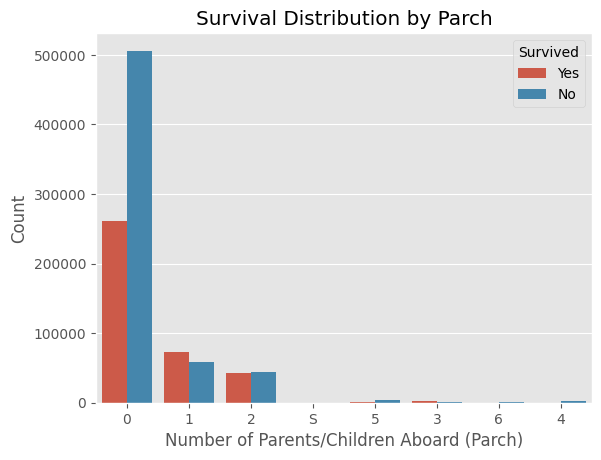

In [73]:

# Map the 'Survived' column: 1 -> 'Yes', 0 -> 'No'
data['Survived'] = data['Survived'].map({1: 'Yes', 0: 'No'})

# Create a count plot for 'Parch' with 'Survived' as columns
sns.countplot(data=data, x='Parch', hue='Survived')
plt.xlabel("Number of Parents/Children Aboard (Parch)")
plt.ylabel("Count")
plt.title("Survival Distribution by Parch")
plt.legend(title="Survived")
plt.show()


/var/folders/gq/vmytp8jn78gbgwl026974x9m0000gn/T/ipykernel_5659/3097064156.py:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/claragazer/Desktop/Bachelorarbeit/Bachelor2/data/titanic.csv')
/var/folders/gq/vmytp8jn78gbgwl026974x9m0000gn/T/ipykernel_5659/3097064156.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Subgroup', y='Survival Rate', palette='muted')


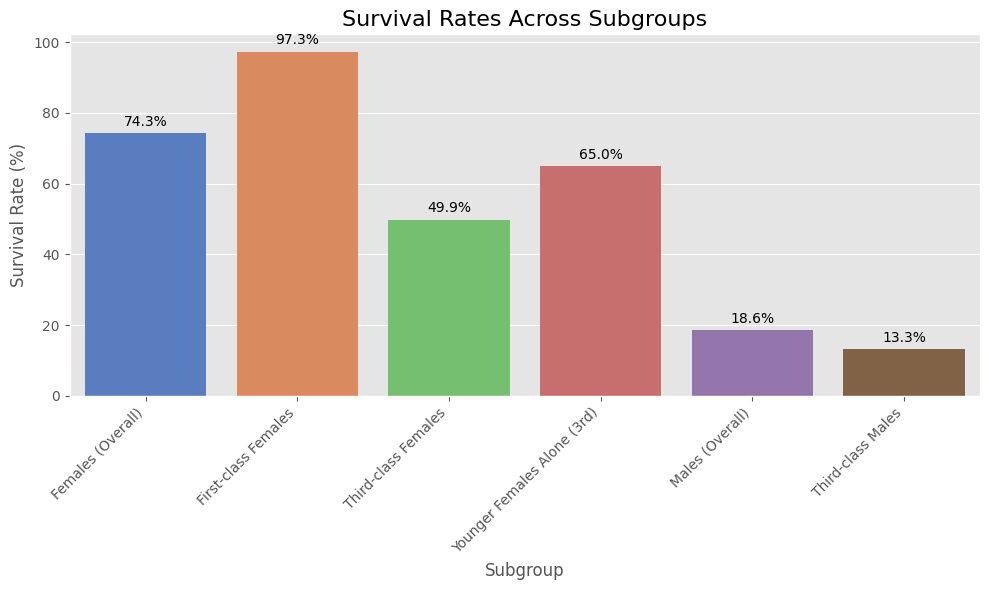

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/claragazer/Desktop/Bachelorarbeit/Bachelor2/data/titanic.csv')
# Subgruppen definieren und Überlebensraten berechnen
subgroups = {
    'Females (Overall)': data[(data['Gender'] == 'female')],
    'First-class Females': data[(data['Gender'] == 'female') & (data['Pclass'] == 1)],
    'Third-class Females': data[(data['Gender'] == 'female') & (data['Pclass'] == 3)],
    'Younger Females Alone (3rd)': data[(data['Gender'] == 'female') & (data['Pclass'] == 3) & (data['Age'] < 30) & (data['SibSp'] == 0) & (data['Parch'] == 0)],
    'Males (Overall)': data[(data['Gender'] == 'male')],
    'Third-class Males': data[(data['Gender'] == 'male') & (data['Pclass'] == 3)]
}

# Überlebensraten berechnen
results = []
for subgroup_name, subgroup_data in subgroups.items():
    survival_rate = subgroup_data['Survived'].mean() * 100  # Prozentsatz berechnen
    results.append({'Subgroup': subgroup_name, 'Survival Rate': survival_rate})

# DataFrame erstellen
df = pd.DataFrame(results)

# NaN-Werte und Inf-Werte entfernen
df = df.dropna()
df = df[~df.isin([float('inf'), float('-inf')]).any(axis=1)]

# Visualisierung
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Subgroup', y='Survival Rate', palette='muted')

# Titel und Achsenbeschriftungen
plt.title("Survival Rates Across Subgroups", fontsize=16)
plt.xlabel("Subgroup", fontsize=12)
plt.ylabel("Survival Rate (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Prozentwerte oberhalb der Balken anzeigen
for index, row in df.iterrows():
    plt.text(index, row['Survival Rate'] + 2, f"{row['Survival Rate']:.1f}%", ha='center')

plt.tight_layout()
plt.show()


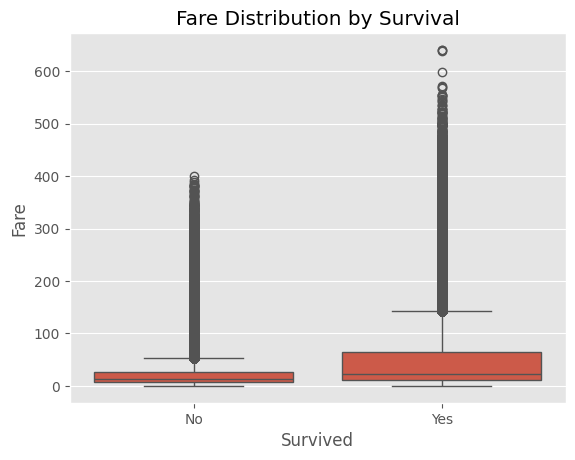

In [77]:
# Box plot for 'Fare' with 'Survived'
sns.boxplot(data=data, x='Survived', y='Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.title("Fare Distribution by Survival")
plt.show()


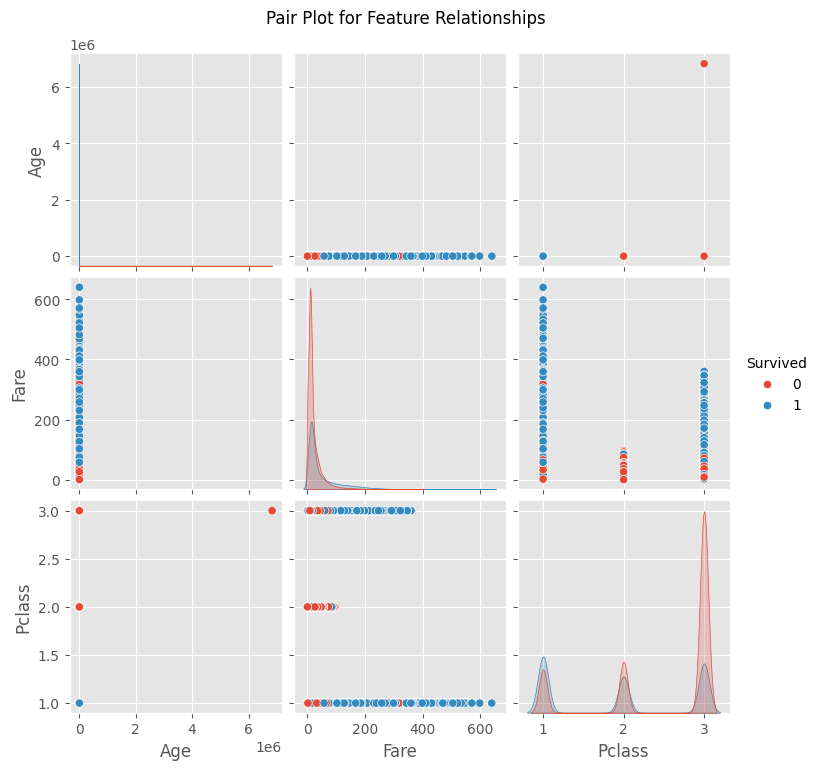

In [78]:
# Pair plot for selected features
selected_features = ['Age', 'Fare', 'Pclass', 'Survived']
sns.pairplot(data[selected_features], hue='Survived', diag_kind='kde')
plt.suptitle("Pair Plot for Feature Relationships", y=1.02)
plt.show()


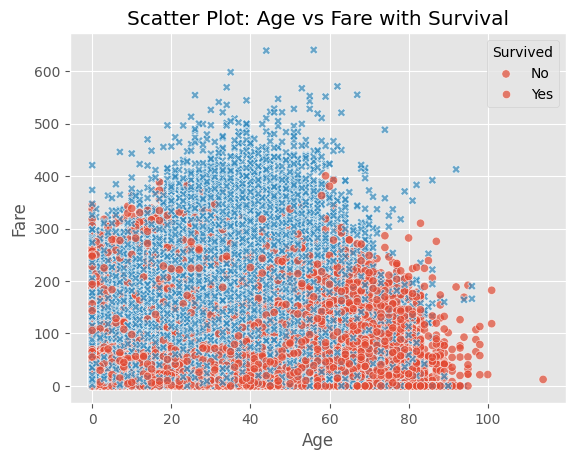

In [79]:
# Scatter plot for 'Age' vs 'Fare' with 'Survived' as hue
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived', style='Survived', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot: Age vs Fare with Survival")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


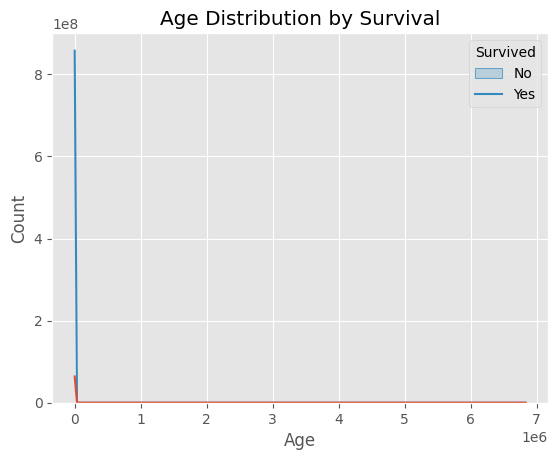

In [81]:
# Histogram of 'Age' separated by 'Survived'
sns.histplot(data=data, x='Age', hue='Survived', kde=True, element='step', bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Survival")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()
